In [1]:
import os
import pandas as pd
import zipfile
import numpy as np
import tensorflow as tf
import scipy.io
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2 as cv
import math

In [31]:
df= pd.read_csv('3D_model_prediction_results.csv')
df.head()

df.describe()

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,1050.000000,1050.000000,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2975.500000,0.026286,1.000000e-03,-0.000278,0.030139,1.336749,0.023331,0.013096,0.003840,0.068311,0.930092,1.482955
std,303.253195,0.018588,4.555819e-18,0.022042,0.010129,45.585897,0.795624,0.017336,0.004864,0.004339,0.093659,0.089848
min,2451.000000,0.000008,1.000000e-03,-0.039937,0.010064,-89.962484,-1.570142,0.000040,0.000017,0.061205,0.619223,1.202511
25%,2713.250000,0.010588,1.000000e-03,-0.018673,0.022113,-31.528559,-0.550277,0.000322,0.000145,0.065324,0.862677,1.423687
50%,2975.500000,0.023033,1.000000e-03,0.000420,0.029838,0.454046,0.007925,0.004302,0.001314,0.067107,0.955005,1.482734
75%,3237.750000,0.037498,1.000000e-03,0.017929,0.038384,33.950915,0.592555,0.021620,0.006658,0.070113,1.000000,1.545519
max,3500.000000,0.079220,1.000000e-03,0.039946,0.049956,89.403917,1.560393,0.089354,0.024334,0.091812,1.262577,1.910013


In [32]:
df[df.defWidth < 0.010588]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
0,2451.0,0.002703,0.001,-0.004055,0.049085,-17.973256,-0.313692,01-Feb-2023 06:45:51,0.001922,0.000573,0.067948,0.896550,1.555373
7,2458.0,0.003398,0.001,-0.011970,0.020946,26.727095,0.466476,01-Feb-2023 06:54:05,0.003820,0.000639,0.063631,0.955973,1.414633
9,2460.0,0.005288,0.001,0.019506,0.022583,-5.225641,-0.091205,01-Feb-2023 06:56:25,0.007018,0.002083,0.064381,1.000000,1.393702
13,2464.0,0.002178,0.001,0.015611,0.023109,-48.962796,-0.854562,01-Feb-2023 07:01:32,0.003770,0.001111,0.063911,1.000000,1.429991
17,2468.0,0.000245,0.001,-0.026900,0.023051,-37.423027,-0.653155,01-Feb-2023 07:06:13,0.001111,0.000278,0.063747,1.000000,1.563473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,3483.0,0.006054,0.001,0.036339,0.033917,-32.091323,-0.560099,02-Feb-2023 13:29:41,0.008370,0.002223,0.065377,1.002231,1.422163
1035,3486.0,0.006583,0.001,0.005306,0.026537,-39.472686,-0.688928,02-Feb-2023 13:33:05,0.010340,0.002292,0.064293,1.258077,1.468834
1041,3492.0,0.000103,0.001,0.022090,0.039988,26.390387,0.460599,02-Feb-2023 13:39:47,0.001120,0.000278,0.064643,1.000000,1.708954
1047,3498.0,0.007729,0.001,0.030884,0.031550,-19.985680,-0.348816,02-Feb-2023 13:46:32,0.007604,0.002045,0.064857,0.983454,1.383165


In [27]:

df= pd.read_csv('defect_3500.csv')

defwidth = df['defWidth']

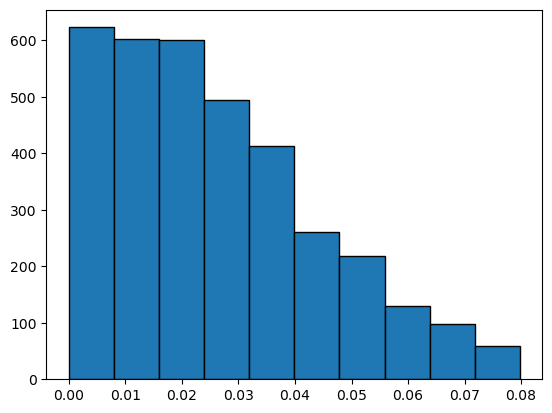

In [28]:
frq, edges = np.histogram(defwidth, 10)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x113de0820>,
 'caps': [<matplotlib.lines.Line2D at 0x113de0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x113de0550>],
 'medians': [<matplotlib.lines.Line2D at 0x113df03a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x113df0670>],
 'means': []}

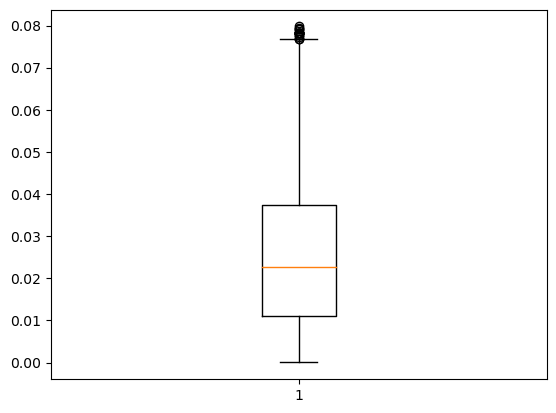

In [29]:
plt.boxplot(defwidth)